# Task 1 : Prediction using Supervised ML

# Predict the percentage of an student based on the no. of study hours.This is a simple linear regression task as it involves just 2 variables.

# Fiyona Shah

In [3]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Reading dataset

In [4]:
data=pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

# As there are no null values,no need to clean the data

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

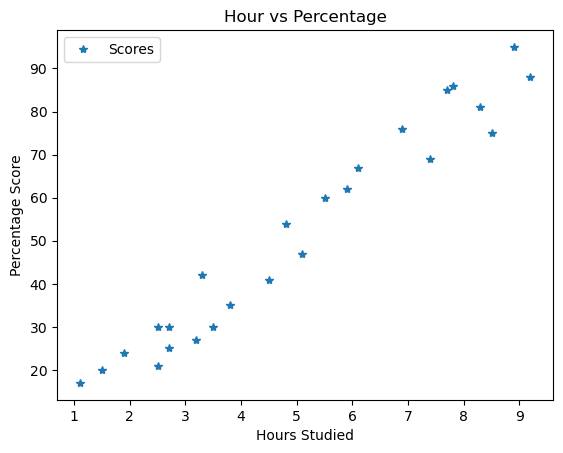

In [5]:
#Now plotting the given data
data.plot(x='Hours',y='Scores',style='*')
plt.title('Hour vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

In [8]:
print("Dataset: \n",data)

print("X is : \n",X)
print("y is : \n",y)

Dataset: 
     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
X is : 
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y is : 
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting data into training andd testig dataset

# Splitting data into training and testing dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
len(X_train)

20

In [23]:
len(y_test)

5

# Construct a model and train it

In [24]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Training complete")

Training complete


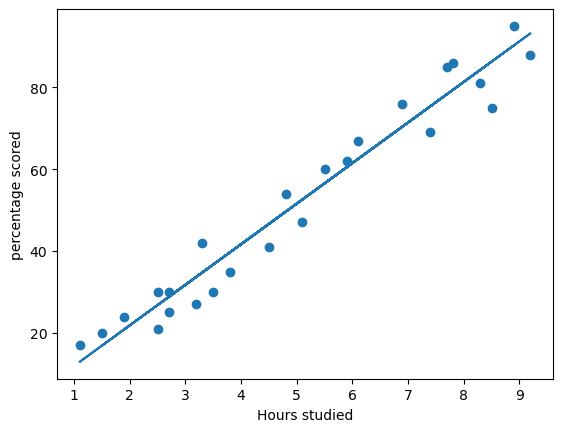

In [25]:
line=(reg.coef_)*X+reg.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.xlabel("Hours studied")
plt.ylabel("percentage scored")
plt.show()

# Test the model

In [26]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [27]:
y_pred=reg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [28]:
#Will compare actual vs predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Now to predict score for student who studies 9.25 hrs/day

In [29]:
Hours=9.25
predicted_score=reg.predict([[Hours]])
print("The predicted score for student who studies 9.25 hrs/day is",predicted_score[0])


The predicted score for student who studies 9.25 hrs/day is 93.69173248737538


# Evaluating the model

In [30]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

4.183859899002975

mean absolute error is 4.18

In [31]:
reg.score(X_test,y_test)

0.9454906892105356

# Accuracy of model is 94%